In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                          user = "postgres",
                                          password = "system",
                                          host = "localhost",
                                          port = "5432")
    def getConnection(self):
        print("Connection to DB established!")
        return self.connection
con = PostgresConnection().getConnection()

Connection to DB established!


In [3]:
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star.fact_table t " \
              "JOIN star.store_dim s on s.store_key=t.store_key " \
                "JOIN star.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE (s.division) "\
                "ORDER BY s.division "
cur.execute(select_stmt)
q1 = cur.fetchall()
q1

[('BARISAL                                           ', Decimal('638101.00')),
 ('CHITTAGONG                                        ', Decimal('1665138.00')),
 ('DHAKA                                             ', Decimal('3440676.25')),
 ('KHULNA                                            ', Decimal('952049.75')),
 ('RAJSHAHI                                          ', Decimal('1041201.25')),
 ('RANGPUR                                           ', Decimal('721057.50')),
 ('SYLHET                                            ', Decimal('465256.75')),
 (None, Decimal('8923480.50'))]

In [4]:
df = pd.DataFrame(list(q1), columns=['division', 'sales'])

In [5]:
df['sales'] = df['sales'].astype('float64')

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt

In [8]:
df1=df.drop([7])

In [9]:
df1

,division,sales
0,BARISAL ...,638101.00
1,CHITTAGONG ...,1665138.00
2,DHAKA ...,3440676.25
3,KHULNA ...,952049.75
4,RAJSHAHI ...,1041201.25
5,RANGPUR ...,721057.50
6,SYLHET ...,465256.75


In [10]:
pip install numpy

In [11]:
import numpy as np

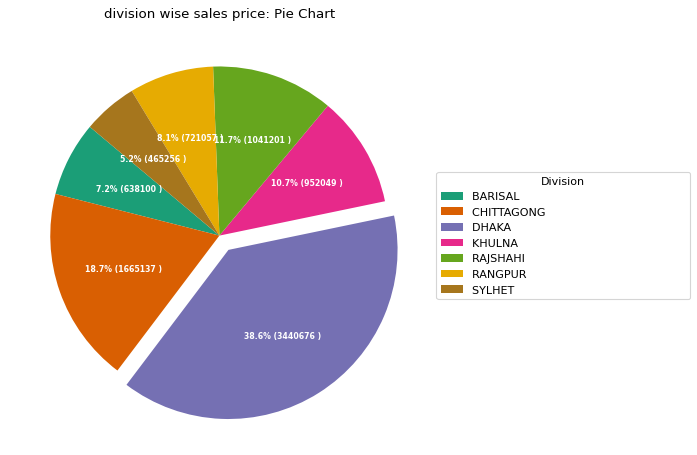

In [12]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df1['sales']
categories = df1['division']
explode = [0,0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Division", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=7, weight=700)
ax.set_title("division wise sales price: Pie Chart")
plt.show()


In [73]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df1['division']
values=df1['sales']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, name="division"),
              1, 1)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="DIVISION WISE SALES",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIVISION', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

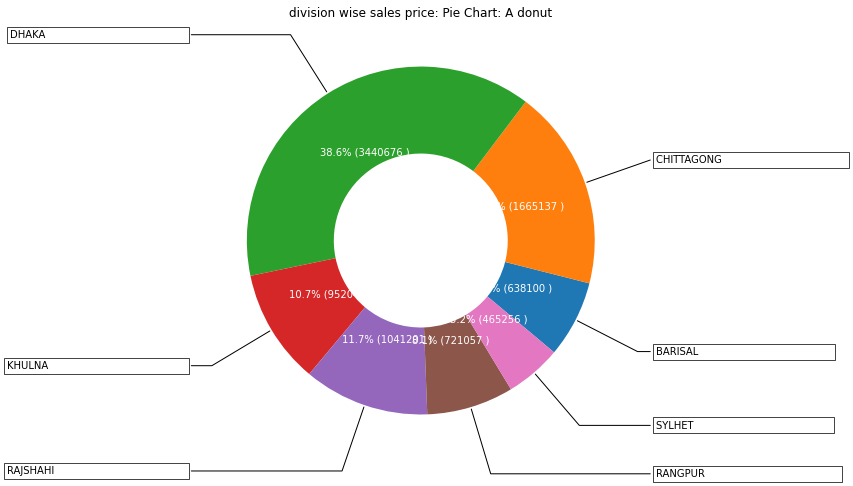

In [14]:
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))

data = df1['sales']
categories = df1['division']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                 wedgeprops=dict(width=0.5) ,
                                 startangle=-40)



#wedges, texts = ax.pie(data,wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(categories[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("division wise sales price: Pie Chart: A donut")

plt.show()

# Q1 District

In [15]:
con = PostgresConnection().getConnection()
insert_stmts = """SELECT store_dim.district as "District", SUM(fact_table.total_price) "Generated_revenue" 
FROM star.fact_table 
JOIN star.store_dim ON
store_dim.store_key = fact_table.store_key 
GROUP BY CUBE(store_dim.district) 
ORDER BY store_dim.district"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmts)
q2 = cur.fetchall()
q2

Connection to DB established!


[('BAGERHAT                                          ', Decimal('1307651.00')),
 ('BANDARBAN                                         ', Decimal('995360.75')),
 ('BARGUNA                                           ', Decimal('869041.00')),
 ('BARISAL                                           ', Decimal('2897237.75')),
 ('BHOLA                                             ', Decimal('1012205.75')),
 ('BOGRA                                             ', Decimal('1716452.75')),
 ('BRAHMANBARIA                                      ', Decimal('1328234.25')),
 ('CHANDPUR                                          ', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ                                  ', Decimal('739447.50')),
 ('CHITTAGONG                                        ', Decimal('7292985.50')),
 ('CHUADANGA                                         ', Decimal('563909.75')),
 ('COMILLA                                           ', Decimal('2286898.25')),
 ("COX'S BAZAR                              

In [16]:
df2 = pd.DataFrame(list(q2), columns=['district', 'Generated_revenue'])

In [17]:
df2['Generated_revenue'] = df2['Generated_revenue'].astype('float64')

In [18]:
df2

,district,Generated_revenue
0,BAGERHAT ...,1.307651e+06
1,BANDARBAN ...,9.953608e+05
2,BARGUNA ...,8.690410e+05
3,BARISAL ...,2.897238e+06
4,BHOLA ...,1.012206e+06
...,...,...
60,SUNAMGANJ ...,1.593774e+06
61,SYLHET ...,1.727717e+06
62,TANGAIL ...,1.774650e+06
63,THAKURGAON ...,7.299342e+05


In [19]:
df2=df2.drop([64])

In [20]:
df2

,district,Generated_revenue
0,BAGERHAT ...,1307651.00
1,BANDARBAN ...,995360.75
2,BARGUNA ...,869041.00
3,BARISAL ...,2897237.75
4,BHOLA ...,1012205.75
...,...,...
59,SIRAJGANJ ...,1295100.75
60,SUNAMGANJ ...,1593774.00
61,SYLHET ...,1727717.25
62,TANGAIL ...,1774650.25


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import seaborn as sns

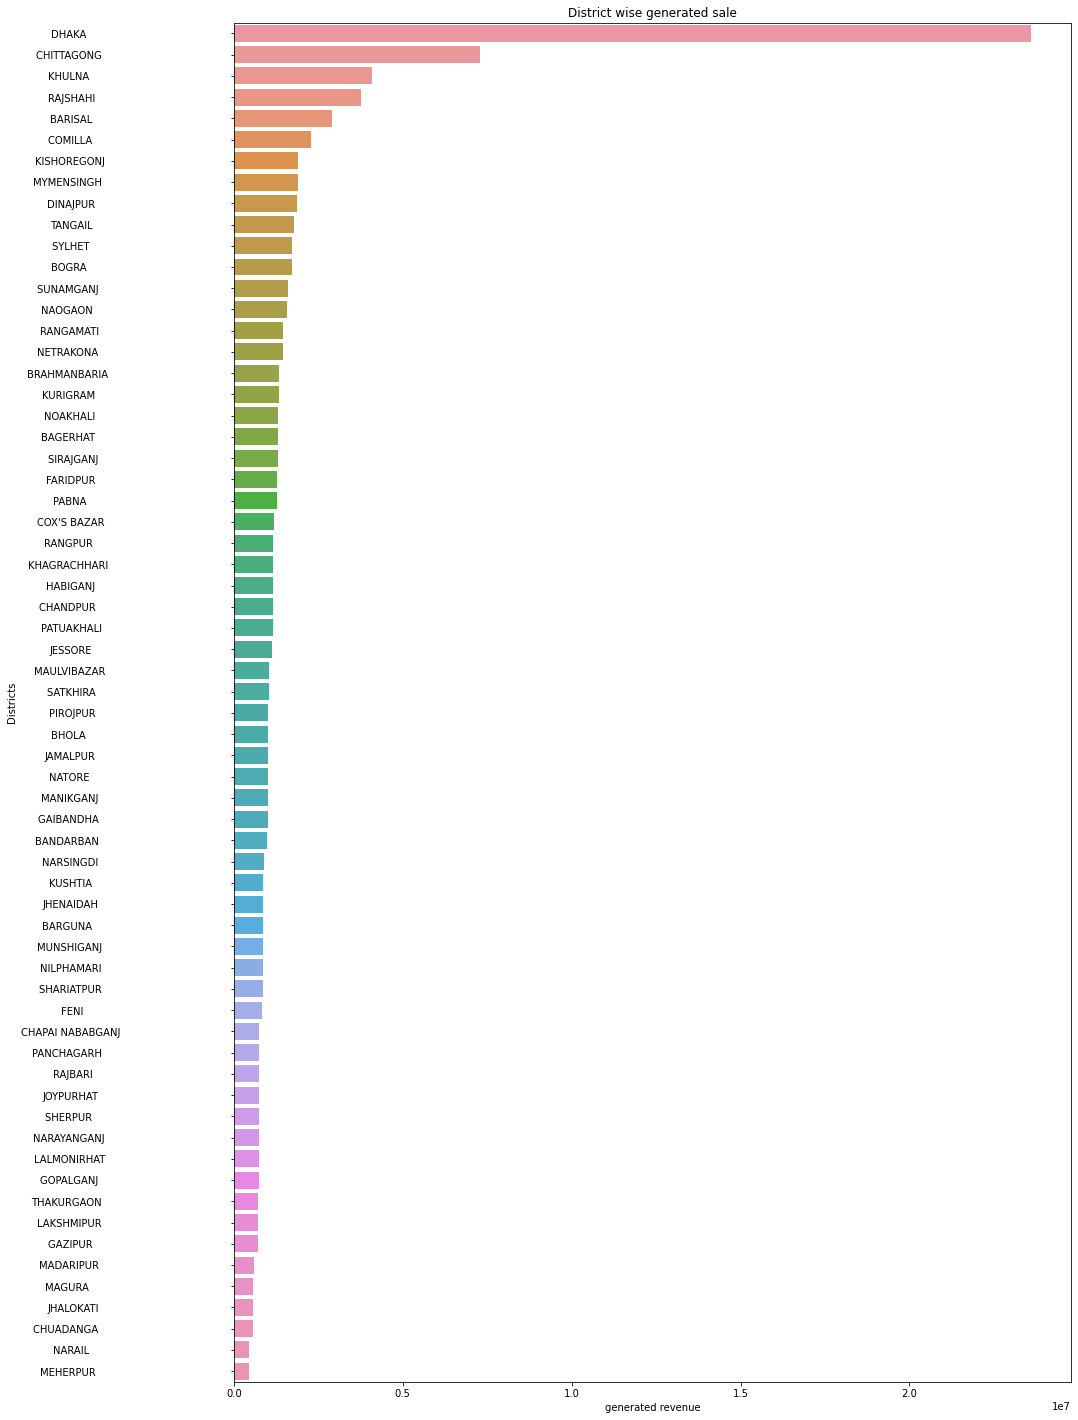

In [23]:
district_order = df2['district']
plt.figure(figsize=(15, 25))
sns.barplot(data=df2,x='Generated_revenue',y='district',order=df2.sort_values('Generated_revenue',ascending = False).district)
sns.color_palette("mako", as_cmap=True)
plt.title('District wise generated sale')
plt.xlabel('generated revenue')
plt.ylabel('Districts');

# Q1 year

In [24]:
con = PostgresConnection().getConnection()
inserted_stmt = """SELECT time_dim.year as "Year", SUM(fact_table.total_price) "Generated_revenue" 
FROM star.fact_table 
JOIN star.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY CUBE(time_dim.year)
ORDER BY time_dim.year"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(inserted_stmt)
q3 = cur.fetchall()
q3

Connection to DB established!


[(Decimal('2014'), Decimal('14334731.25')),
 (Decimal('2015'), Decimal('15095720.25')),
 (Decimal('2016'), Decimal('14976508.25')),
 (Decimal('2017'), Decimal('15015806.00')),
 (Decimal('2018'), Decimal('15108197.25')),
 (Decimal('2019'), Decimal('14949510.25')),
 (Decimal('2020'), Decimal('15037190.25')),
 (Decimal('2021'), Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [25]:
df4=pd.DataFrame(list(q3),columns=(['year','sales']))

In [26]:
df4

,year,sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25
8,None,105401435.75


In [27]:
df5=df4.drop([8])

In [28]:
df5['sales'] = df5['sales'].astype('float64')

In [29]:
df5

,year,sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25


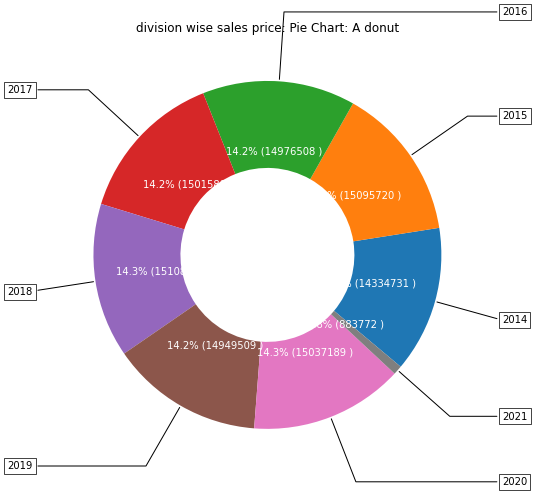

In [30]:
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))

data = df5['sales']
categories = df5['year']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                 wedgeprops=dict(width=0.5) ,
                                 startangle=-40)



#wedges, texts = ax.pie(data,wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(categories[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("division wise sales price: Pie Chart: A donut")

plt.show()

In [31]:
con = PostgresConnection().getConnection()
inserted_stmt = """SELECT time_dim.month as "month", SUM(fact_table.total_price) "sales" 
FROM star.fact_table 
JOIN star.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY CUBE(time_dim.month)
ORDER BY time_dim.month"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(inserted_stmt)
q6 = cur.fetchall()
q6

Connection to DB established!


[(Decimal('1'), Decimal('9042244.00')),
 (Decimal('2'), Decimal('8073877.50')),
 (Decimal('3'), Decimal('8939152.00')),
 (Decimal('4'), Decimal('8504634.75')),
 (Decimal('5'), Decimal('9078002.50')),
 (Decimal('6'), Decimal('8556853.00')),
 (Decimal('7'), Decimal('9046580.00')),
 (Decimal('8'), Decimal('8929475.25')),
 (Decimal('9'), Decimal('8724326.50')),
 (Decimal('10'), Decimal('8902783.75')),
 (Decimal('11'), Decimal('8680026.00')),
 (Decimal('12'), Decimal('8923480.50')),
 (None, Decimal('105401435.75'))]

In [32]:
df6=pd.DataFrame(list(q6), columns=['month','sales'])

In [33]:
df6

,month,sales
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [34]:
df6=df6.drop([12])

In [35]:
df6

,month,sales
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [36]:
df6['sales'] = df6['sales'].astype('float64')

In [70]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df6['month']
values=df6['sales']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, name="first store"),
              1, 1)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="MONTH WISE SALES",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='month', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

Text(0, 0.5, 'total sales')

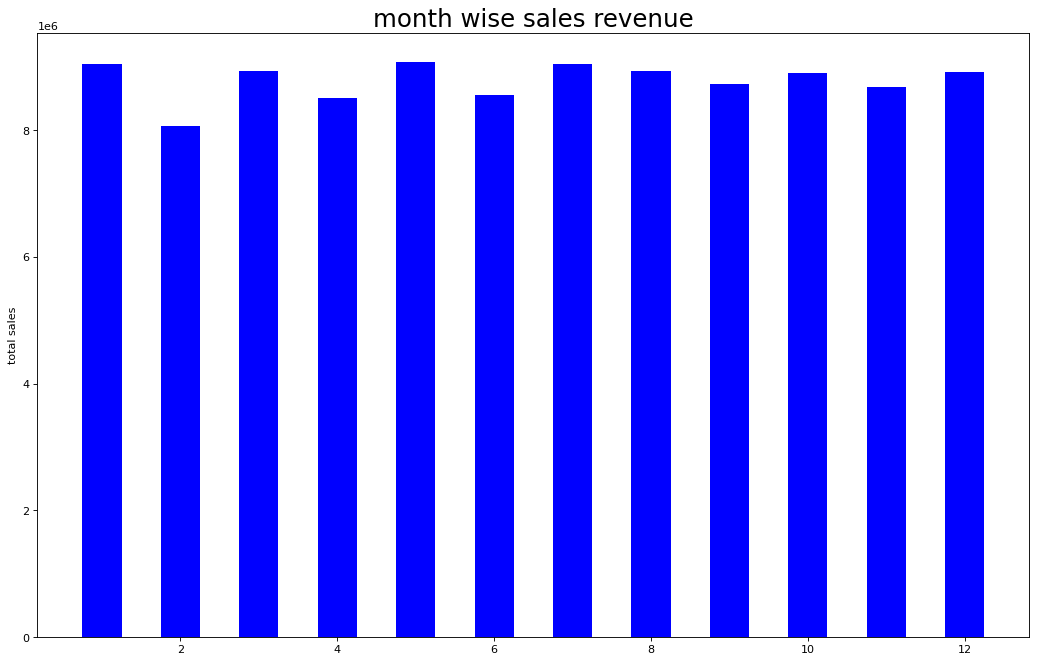

In [37]:


# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df6['month'], df6['sales'], color='blue', width=.5)
plt.title("month wise sales revenue", fontsize=22)
plt.ylabel('total sales')


# Q2 ; Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [38]:
con=PostgresConnection().getConnection()

Connection to DB established!


In [39]:
statement="""SELECT customer_dim.name as "name", SUM(fact_table.total_price) "sales"
FROM star.fact_table
JOIN star.customer_dim ON
customer_dim.customer_key = fact_table.customer_key
GROUP BY CUBE(customer_dim.name)
ORDER BY customer_dim.name"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statement)
q7 = cur.fetchall()
q7

[('-                                                 ', Decimal('20643.50')),
 ('aafreen fatima                                    ', Decimal('11174.75')),
 ('aafrin                                            ', Decimal('22136.75')),
 ('aafrin @ dolly                                    ', Decimal('23529.75')),
 ('aaftaab husan                                     ', Decimal('9682.00')),
 ('aakanksha                                         ', Decimal('11469.00')),
 ('aaliya                                            ', Decimal('21663.25')),
 ('aamina                                            ', Decimal('12649.25')),
 ('aamir                                             ', Decimal('10134.00')),
 ('aamir hussain                                     ', Decimal('10892.50')),
 ('aamod & pramod                                    ', Decimal('12280.25')),
 ('aamrin jahan                                      ', Decimal('11622.00')),
 ('aanamika misra                                    ', Decimal('

# Q2 : Bank

In [40]:
statement="""SELECT Trans_dim.bank_name as "bank", SUM(fact_table.total_price) "sales"
FROM star.fact_table
JOIN star.Trans_dim ON
Trans_dim.payment_key = fact_table.payment_key
GROUP BY CUBE(Trans_dim.bank_name)
ORDER BY Trans_dim.bank_name"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statement)
q8 = cur.fetchall()
q8

[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [41]:
df8=pd.DataFrame(list(q8), columns=(['bank','sales']))

In [42]:
df8

,bank,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [43]:
df8=df8.drop([39])

In [44]:
df8['sales']=df8['sales'].astype('float64')

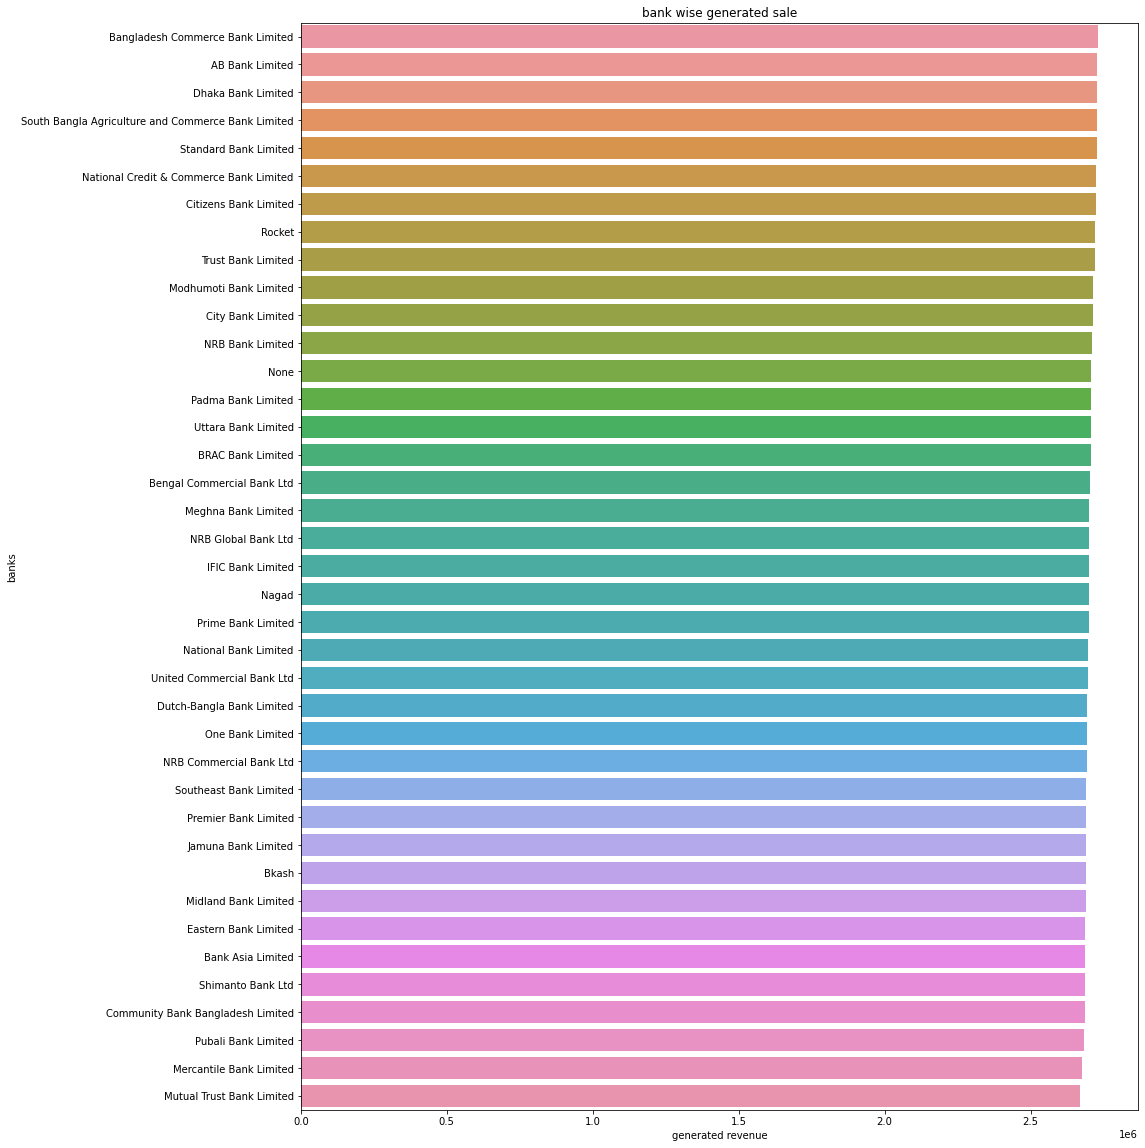

In [45]:
bank = df8
plt.figure(figsize=(15, 20))
sns.barplot(data=df8,x=df8['sales'],y=df8['bank'],order=df8.sort_values('sales',ascending = False).bank)
sns.color_palette("mako", as_cmap=True)
plt.title('bank wise generated sale')
plt.xlabel('generated revenue')
plt.ylabel('banks');

In [46]:
statement="""SELECT Trans_dim.trans_type as "transaction_type", SUM(fact_table.total_price) "sales"
FROM star.fact_table
JOIN star.Trans_dim ON
Trans_dim.payment_key = fact_table.payment_key
GROUP BY Trans_dim.trans_type
ORDER BY Trans_dim.trans_type"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statement)
q9 = cur.fetchall()
q9



[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50'))]

In [47]:
df9=pd.DataFrame(list(q9), columns=['transaction_type','sales'])

In [48]:
df9

,transaction_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [49]:
df9['sales']=df9['sales'].astype('float64')

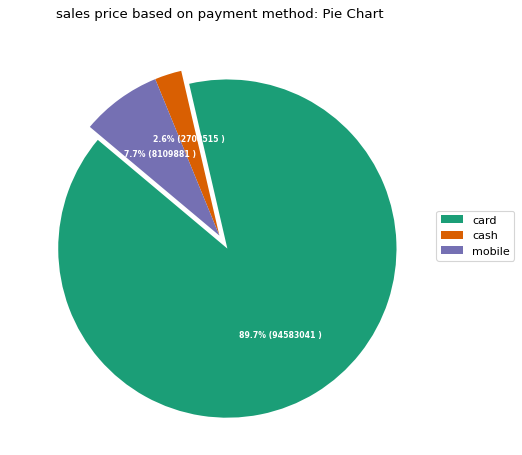

In [50]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df9['sales']
categories = df9['transaction_type']
explode = [0.09,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=7, weight=700)
ax.set_title("sales price based on payment method: Pie Chart")
plt.show()

# Q3

In [51]:
statements="""SELECT store_dim.district as "district", SUM(fact_table.total_price) "sales"
FROM star.fact_table
JOIN star.store_dim ON
store_dim.store_key = fact_table.store_key
WHERE store_dim.district='BARISAL'
GROUP BY store_dim.district
"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statements)
q9 = cur.fetchall()
q9



[('BARISAL                                           ', Decimal('2897237.75'))]

# Q4

In [52]:
statements="""SELECT time_dim.year as "year", SUM(fact_table.total_price) "sales"
FROM star.fact_table
JOIN star.time_dim ON
time_dim.time_key = fact_table.time_key
WHERE time_dim.year='2015'
GROUP BY time_dim.year
"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statements)
q9 = cur.fetchall()
q9

[(Decimal('2015'), Decimal('15095720.25'))]

# Q5

In [53]:
statements="""SELECT store_dim.district as "district",time_dim.year,SUM(fact_table.total_price) "sales"
FROM star.fact_table
JOIN star.store_dim ON
store_dim.store_key=fact_table.store_key
JOIN star.time_dim ON
time_dim.time_key=fact_table.time_key
WHERE store_dim.district='BARISAL'AND
time_dim.year='2015'
GROUP BY time_dim.year,store_dim.district
"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_sales_in_2015_and_barisal = pd.read_sql_query(statements, con)
con.commit()
cur.close()

C:\Users\Arifurk\myenv\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [54]:
total_sales_in_2015_and_barisal

,district,year,sales
0,BARISAL ...,2015.0,415748.75


# Q6

In [55]:
con = PostgresConnecti on().getConnection()
curr = con.cursor()
select_stmts = """SELECT store_dim.store_key as store_key, item_dim.item_name as item_name, sum(fact_table.quantity) as quantity_of_sales 
FROM star.fact_table  
JOIN star.store_dim ON
store_dim.store_key = fact_table.store_key 
JOIN star.item_dim ON 
item_dim.item_key = fact_table.item_key 
GROUP BY CUBE(store_dim.store_key, item_dim.item_name)
ORDER BY store_dim.store_key, sum(fact_table.quantity) desc"""
                
curr.execute(select_stmts)
most_purchased_product = curr.fetchall()
most_purchased_product

Connection to DB established!


[('S0001', None, Decimal('8169')),
 ('S0001', 'Pepsi - 12 oz cans', Decimal('92')),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', Decimal('90')),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', Decimal('78')),
 ('S0001', 'Waterloo Sparkling Lime 12oz', Decimal('70')),
 ('S0001', 'Njoy Sugar Canister 22 oz', Decimal('69')),
 ('S0001', 'Vita Coconut Water 10oz ', Decimal('68')),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', Decimal('67')),
 ('S0001', 'Sprite - 12 oz cans', Decimal('64')),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', Decimal('63')),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', Decimal('62')),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', Decimal('61')),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', Decimal('60')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'Dark Chocolate Mint Patties', Decimal('60')),
 ('S0001', 'Large Trash Bags Black 33 gal', Decimal('59')),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', De

In [56]:
topmost_purchased_product = pd.DataFrame(list(most_purchased_product), columns=['store_id', 'item', 'quantity'])
topmost_purchased_product=topmost_purchased_product.dropna()
topmost_purchased_product = topmost_purchased_product.groupby('store_id').head(3)
topmost_purchased_product.head(100)

,store_id,item,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
...,...,...,...
8013,S0012,Propel Zero Variety 20 oz,76
8270,S00120,Pepsi - 12 oz cans,85
8271,S00120,Sprite - 12 oz cans,73
8272,S00120,Mars Mini Mix,72


In [57]:
topmost_purchased_product.dtypes

store_id    object
item        object
quantity    object
dtype: object

In [58]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = topmost_purchased_product['item']
values=topmost_purchased_product['quantity']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values.head(3), name="first store"),
              1, 1)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="TOP PURCHASED PRODUCT IN STORE 1",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='PRODUCT', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

# Q8

In [60]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT item_dim.item_name, quarter, SUM(quantity)
FROM star.fact_table
JOIN star.item_dim ON item_dim.item_key = fact_table.item_key
JOIN star.time_dim ON time_dim.time_key = fact_table.time_key
GROUP BY CUBE(item_name, time_dim.quarter)
ORDER BY item_name, SUM(quantity)"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
worst_season = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()
worst_season.groupby('item_name').head(1)

Connection to DB established!


C:\Users\Arifurk\myenv\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
10,A&W Root Beer Diet - 12 oz cans,Q4,5589.0
15,Advil 2 pill packets,Q1,5453.0
20,All Purpose Cleaner 409 Spray,Q1,5325.0
...,...,...,...
1270,Welch's 100% Juice Variety10 oz,Q2,5494.0
1275,Wint O Green LifeSavers Sugar Free,Q1,5323.0
1280,Wonderful Pistachios (in shell),Q1,5578.0
1285,Yoplait Original Yogurt Variety Pack,Q1,5426.0


In [61]:
worst_season.dropna()

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
1,100% Juice Box Variety 6.75 oz,Q4,5806.0
2,100% Juice Box Variety 6.75 oz,Q2,5876.0
3,100% Juice Box Variety 6.75 oz,Q3,6045.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
...,...,...,...
1288,Yoplait Original Yogurt Variety Pack,Q3,5761.0
1290,Zoo Animal Cookies/Crackers,Q1,5462.0
1291,Zoo Animal Cookies/Crackers,Q2,5508.0
1292,Zoo Animal Cookies/Crackers,Q4,5520.0


In [62]:
worst_season.groupby('item_name').head(1)

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
10,A&W Root Beer Diet - 12 oz cans,Q4,5589.0
15,Advil 2 pill packets,Q1,5453.0
20,All Purpose Cleaner 409 Spray,Q1,5325.0
...,...,...,...
1270,Welch's 100% Juice Variety10 oz,Q2,5494.0
1275,Wint O Green LifeSavers Sugar Free,Q1,5323.0
1280,Wonderful Pistachios (in shell),Q1,5578.0
1285,Yoplait Original Yogurt Variety Pack,Q1,5426.0


In [63]:
worst_season.groupby('item_name').head(3)

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
1,100% Juice Box Variety 6.75 oz,Q4,5806.0
2,100% Juice Box Variety 6.75 oz,Q2,5876.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
6,A&W Root Beer - 12 oz cans,Q4,5820.0
...,...,...,...
1286,Yoplait Original Yogurt Variety Pack,Q2,5508.0
1287,Yoplait Original Yogurt Variety Pack,Q4,5737.0
1290,Zoo Animal Cookies/Crackers,Q1,5462.0
1291,Zoo Animal Cookies/Crackers,Q2,5508.0


# Q10

In [64]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT store_dim.store_key as "STORE", month as "MONTH", SUM(total_price)/30 as "Average sales"
FROM star.fact_table
JOIN star.store_dim ON
store_dim.store_key = fact_table.store_key
JOIN star.time_dim ON 
time_dim.time_key = fact_table.time_key
GROUP BY CUBE(store_dim.store_key, time_dim.month)
ORDER By store_dim.store_key, month"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
avg_sales_of_product = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\Arifurk\myenv\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [65]:
avg_sales_of_product

,STORE,MONTH,Average sales
0,S0001,1.0,3.779833e+02
1,S0001,2.0,3.453167e+02
2,S0001,3.0,3.902500e+02
3,S0001,4.0,3.724500e+02
4,S0001,5.0,3.715583e+02
...,...,...,...
9446,None,9.0,2.908109e+05
9447,None,10.0,2.967595e+05
9448,None,11.0,2.893342e+05
9449,None,12.0,2.974493e+05


In [66]:
avg_sales_of_product=avg_sales_of_product.dropna()

In [67]:
avg_sales_of_product

,STORE,MONTH,Average sales
0,S0001,1.0,377.983333
1,S0001,2.0,345.316667
2,S0001,3.0,390.250000
3,S0001,4.0,372.450000
4,S0001,5.0,371.558333
...,...,...,...
9432,S0099,8.0,314.558333
9433,S0099,9.0,410.891667
9434,S0099,10.0,452.275000
9435,S0099,11.0,368.675000
